# **Assignment: Use XGboost to predict bus arrival delay**
In the following part, I will develop XGBoost models to predict bus arrival delays and tune the model parameters to achieve the best performance.



# **Regression**
Regression models predict numeric outcomes such as the price of a car, the age of a person, or the delay at a bus stop. Let's use a portion of a larger bus-delay dataset from Stockholm to train a regression model to predict the arrival delay given the dwell time, scheduled travel time, upstream stop delay, and recurrent delay.

## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Tongm56/Assignments-Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


How many rows and columns does the dataset contain?

In [ ]:
df.shape

(2179, 9)

Are any of the columns missing values?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


Remove columns that are no longer needed.

In [ ]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

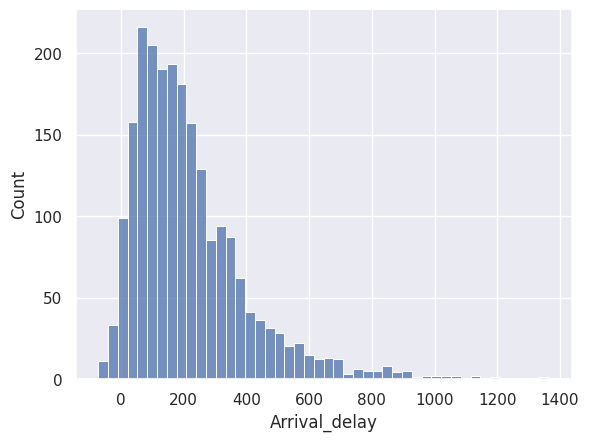

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [ ]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

Arrival_delay            1.000000
Upstream_stop_delay      0.993935
Dwell_time               0.218745
Recurrent_delay          0.162692
Scheduled_travel_time    0.100695
Name: Arrival_delay, dtype: float64

Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

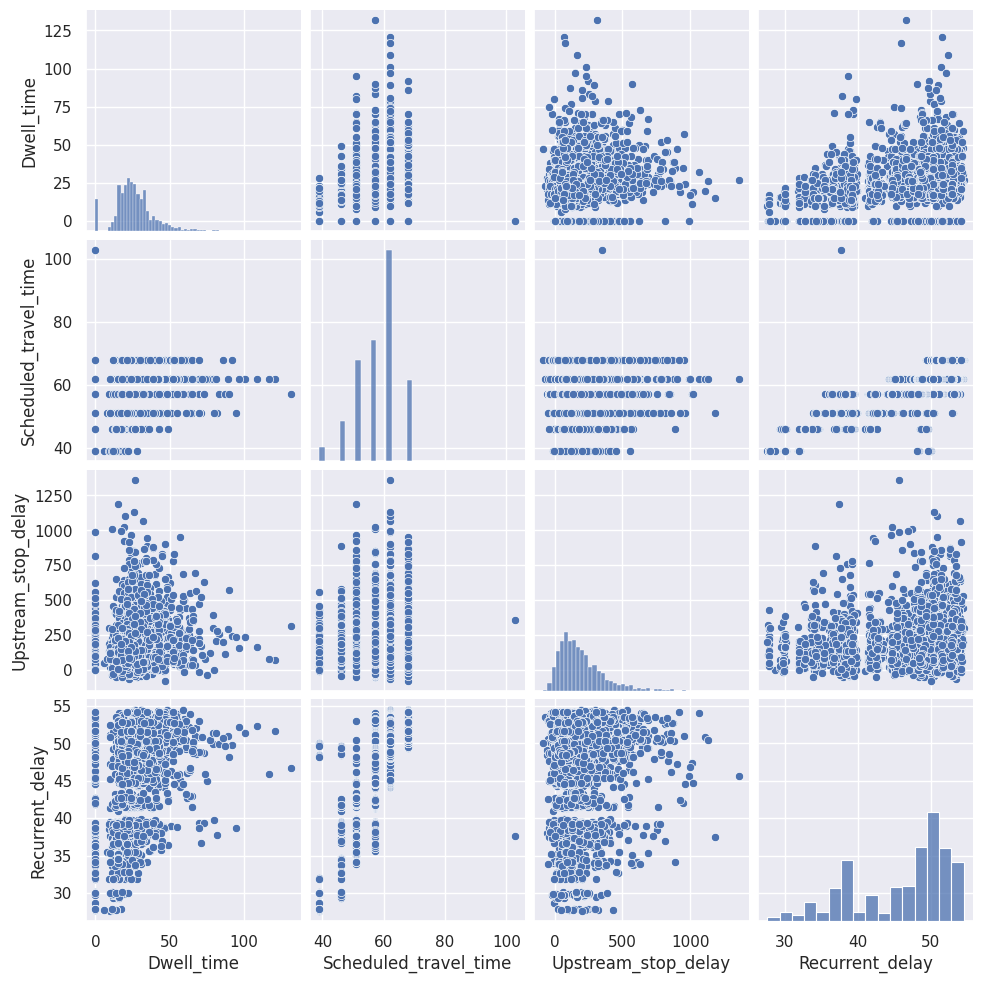

In [ ]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## Training and prediction
We split the dataset into a training and a test dataset. Then, we fit the XGBoost regression model with the training dataset and predict the values for the test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



## Create a XGBoost regression model
Now it's time build a XGBoost regression model and train it with the data prepared in the previous exercise.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700],
            'max_depth': [3, 4, 5, 6, 7, 8],
            'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}

# Create an XGBoost regressor
xgb = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)




Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
# Create a XGBoost Regression model
model = XGBRegressor(n_estimators=300,
                     learning_rate=0.05,
                     max_depth=3,
                     )
model.fit(X_train, y_train)

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.645072799688633
Mean Squared Error: 208.50539704325163
R-squared: 0.993007857615909


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

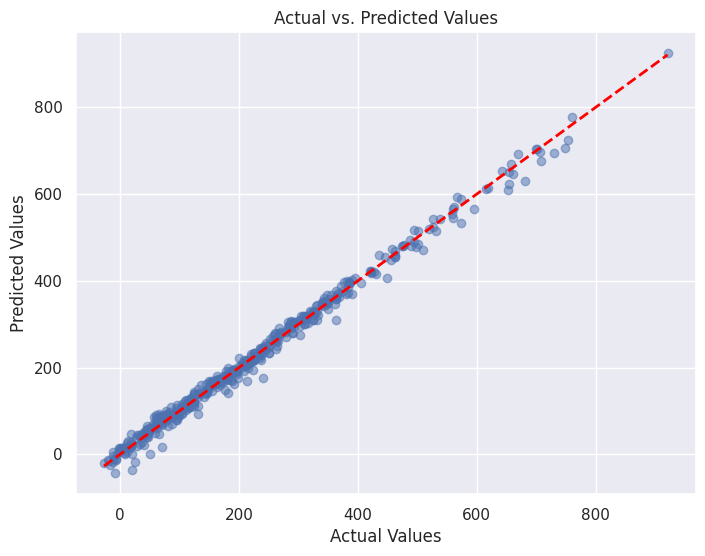

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()